### Portfolio Testing (pricing)

In [101]:
import pandas as pd
import numpy as np
from environment import Environment

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [151]:
from historical import HistoricalData
from pandas._libs.tslibs.timestamps import Timestamp, Timedelta

path = "data\\"
env_df = pd.read_csv(path + "Consolidated.csv", header = [0,1], index_col=[0])
targets_df = pd.read_csv(path + "Targets.csv", index_col=[0])
features_df = pd.read_csv(path + "Features.csv", header = [0,1], index_col=[0])


data = HistoricalData(env_df, features_df, targets_df)

In [211]:
import instrument
i1 = instrument.Equity('SPY US Equity', 'USD')
i2 = instrument.Option(name='SPY Put', ccy='USD', is_call=0, ul='SPY US Equity', K=285, T=Timestamp('2017-03-31'))
date = Timestamp('2017-01-31')
prices, fx, divs, surfaces, curves = data.get_env_args(date)
env_now = Environment(date, prices, fx, divs, surfaces, curves)

In [212]:
i2.value(env_now)

0.9451411716691382

In [213]:
from portfolio import Portfolio
my_pf = Portfolio({i1: 2, i2:2})

In [214]:
my_pf.calc_value(env_now)

593.7798823433383

### Regression Testing

In [221]:
from historical import ShockMap, Distribution
sm = ShockMap(data, date)
dist = Distribution(data, date, method='normal')

In [222]:
rets = []
val_now = my_pf.calc_value(env_now)
for i in range(1000):
    asset_shocks = sm.map_factors(dist.generate_shock())
    env_sim = env_now.simulate(asset_shocks)
    #print(my_pf.calc_value(env_sim))
    #print(i1.value(env_sim), i2.value(env_sim))
    rets.append(np.log(my_pf.calc_value(env_sim)/val_now))
    
rets = pd.Series(rets)

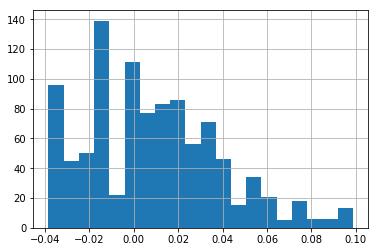

In [223]:
import matplotlib.pyplot as plt
rets.hist(bins=20)